In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

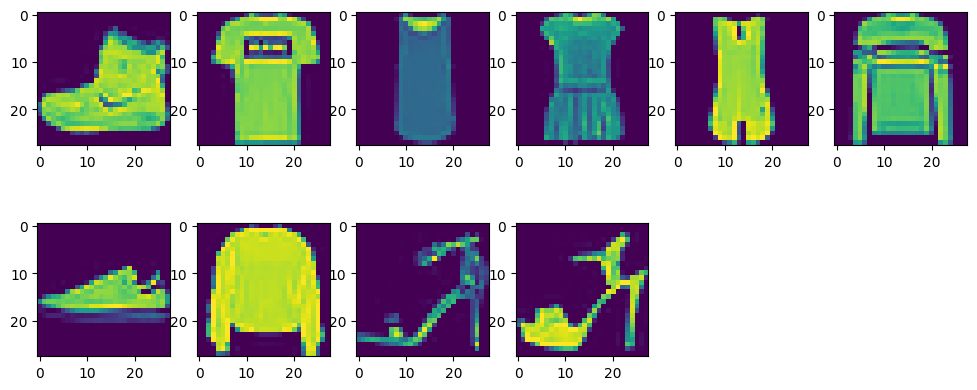

In [3]:
# create list of clothes
clothes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create subplot with clothes images
plt.figure(figsize=(12, 16))
for i in range(10):
    fig = plt.subplot(6, 6, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    
    

In [4]:
from tensorflow.keras import layers, models

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [6]:
y_train[100]

8

In [7]:
y_test[0]

9

In [8]:
from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_trainen = to_categorical(y_train, 10)
y_testen = to_categorical(y_test, 10)


In [9]:
y_trainen[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
y_testen[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

# Define the CNN model using the Sequential API
model = models.Sequential()

# First Convolutional Layer:
# Conv2D applies 32 filters of size (3x3) to the input image (28x28, 1 channel), with ReLU activation and 'same' padding.
# 'same' padding ensures the output size remains the same as the input.
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

# First Max Pooling Layer:
# MaxPooling2D downsamples the feature maps by taking the maximum value in each (2x2) window, reducing spatial dimensions.
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer:
# Applies 64 filters of size (3x3) with ReLU activation and 'same' padding.
# The number of filters increases to help the model learn more complex features.
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Second Max Pooling Layer:
# Another (2x2) max-pooling layer to further reduce spatial dimensions.
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer:
# Applies 128 filters of size (3x3), with ReLU activation and 'same' padding for learning even more complex features.
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Third Max Pooling Layer:
# Another (2x2) max-pooling layer to further reduce the spatial size of the feature maps.
model.add(layers.MaxPooling2D((2, 2)))

# Optional fourth convolutional and pooling layers were commented out but could be added for deeper feature extraction.
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer:
# Flattens the 3D output from the convolutional and pooling layers into a 1D vector for fully connected layers.
model.add(layers.Flatten())

# Fully Connected Layer (Dense Layer):
# A fully connected layer with 64 neurons, ReLU activation, Glorot uniform initializer, and L1_L2 regularization.
# Regularization helps prevent overfitting by applying penalties to large weights.
model.add(layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform',
                       kernel_regularizer=regularizers.l1_l2(0.001)))

# Output Layer:
# The output layer uses 10 neurons (since this is likely a classification problem with 10 classes, e.g., Fashion MNIST).
# Softmax activation function converts the output to probability distributions across the 10 classes.
model.add(layers.Dense(10, activation='softmax'))

# Compile the model:
# The model uses the Adam optimizer with a learning rate of 0.00107.
# Categorical crossentropy is the loss function (since we are using one-hot encoded labels for classification).
# Accuracy is the metric used to evaluate the performance during training and testing.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0010748080614242867),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model:
# The model is trained using the training data (x_train and y_trainen), with a batch size of 64.
# The model will iterate over the entire dataset for 10 epochs.
model.fit(x_train, y_trainen, batch_size=64, epochs=10)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.7244 - loss: 1.5440
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8683 - loss: 0.5286
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8869 - loss: 0.4222
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8956 - loss: 0.3775
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9051 - loss: 0.3482
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9105 - loss: 0.3292
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9163 - loss: 0.3110
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9189 - loss: 0.2978
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9246 - loss: 0.2873
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9260 - loss: 0.2763


In [12]:
model.evaluate(x_train,y_trainen)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9282 - loss: 0.2630


[0.2656398117542267, 0.9278166890144348]

In [13]:
model.evaluate(x_test,y_testen)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9064 - loss: 0.3285


[0.32854795455932617, 0.9065999984741211]

In [14]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


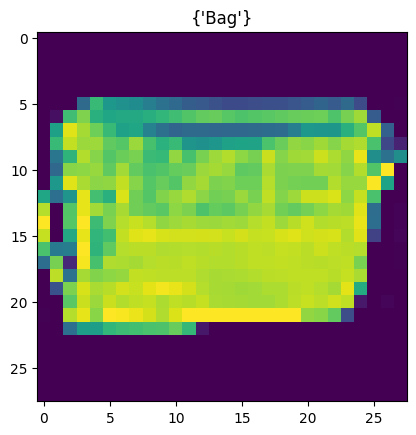

In [15]:
plt.imshow(x_test[56])
plt.title({clothes_names[ np.argmax(y_pred[56])]})
plt.show()